###### Importing Libariries to work on the project

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pandas_profiling

In [2]:

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

from sklearn.model_selection import cross_val_score

Setting the Directory

In [4]:
os.chdir(r'E:\mine\Big Data & ML\project\reg')
os.getcwd()

'E:\\mine\\Big Data & ML\\project\\reg'

Loading the file to do EDA and Modelling

In [5]:
dfcla=pd.read_csv('winequality-red.csv',na_values='NA')

Dataset Description

The Wine Quality dataset contains information about various physicochemical properties of wines. e are going to download and load the dataset into Python and perform an initial analysis to disclose what is inside it. And applying some Machine learning algorithms.

FEATURES DESCRIPTION

Fixed acidity: It indicates the amount of tartaric acid in wine and is measured in g/dm3

Volatile acidity: It indicates the amount of acetic acid in the wine. It is measured in g/dm3.

Citric acid: It indicates the amount of citric acid in the wine. It is also measured in g/dm3

Residual sugar: It indicates the amount of sugar left in the wine after the fermentation process is done. It is also measured in g/dm3

Free sulfur dioxide: It measures the amount of sulfur dioxide (SO2) in free form. It is also measured in g/dm3

Total sulfur dioxide: It measures the total amount of SO2 in the wine. This chemical works as an antioxidant and antimicrobial agent.

Density: It indicates the density of the wine and is measured in g/dm3.

pH: It indicates the pH value of the wine. The range of value is between 0 to 14.0, which indicates very high acidity, and 14 indicates basic acidity.

Sulphates: It indicates the amount of potassium sulphate in the wine. It is also measured in g/dm3.

Alcohol: It indicates the alcohol content in the wine.

Quality: It indicates the quality of the wine, which is ranged from 1 to 10. Here, the higher the value is, the better the wine.


In [6]:
dfcla.shape

(1599, 12)

In [7]:
dfcla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


Checking for null values in the dataset 

In [8]:
dfcla.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

There is no null values present in the dataset

In [9]:
dfcla.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4,5.0


In [10]:
dfcla.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.995,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.995,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.996,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.995,3.57,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.995,3.39,0.66,11.0,6.0


In [11]:
dfcla.astype('object').describe().transpose()

,count,unique,top,freq
fixed acidity,1599.0,96.0,7.200,67.0
volatile acidity,1599.0,143.0,0.600,47.0
citric acid,1599.0,80.0,0.000,132.0
residual sugar,1599.0,91.0,2.000,156.0
chlorides,1599.0,153.0,0.080,66.0
free sulfur dioxide,1599.0,60.0,6.000,138.0
total sulfur dioxide,1599.0,144.0,28.000,43.0
density,1599.0,15.0,0.997,398.0
pH,1599.0,89.0,3.300,57.0
sulphates,1599.0,96.0,0.600,69.0


In [12]:
dfcla.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996752,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001891,0.154386,0.169507,1.065669,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990000,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.996000,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.997000,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.998000,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.004000,4.010000,2.000000,14.900000,8.000000


###### EDA

In [13]:
#red wine quality value count
quality_value_count=dfcla["quality"].value_counts()
quality_value_count

5.0    681
6.0    638
7.0    199
4.0     53
8.0     18
3.0     10
Name: quality, dtype: int64

<AxesSubplot:ylabel='quality'>

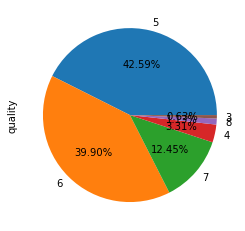

In [19]:

%matplotlib inline
quality_value_count.plot.pie(autopct="%.2f%%")

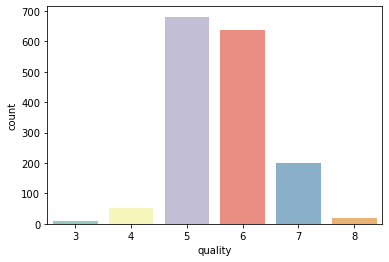

In [20]:
gr = sns.countplot(x="quality", data=dfcla, palette="Set3")

From the above graph we can infer that wine withe quality of 5 and 6 are more compared to others

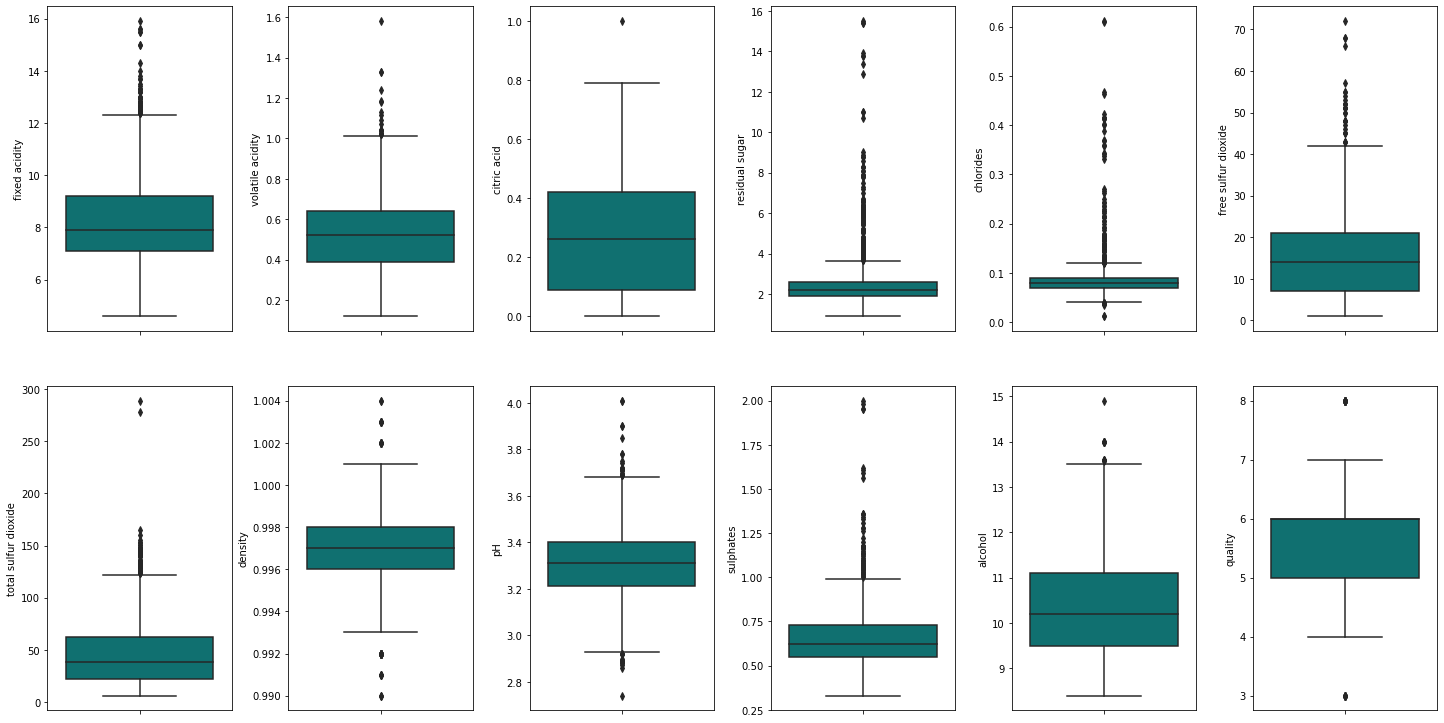

In [14]:
#lets see whether our data has outliers or not:


# create box plots
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(20,10))
index = 0
ax = ax.flatten()

for col, value in dfcla.items():
    sns.boxplot(y=col, data=dfcla, color='teal', ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)

from the above graph we can see that outliers are present in all the X variables

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

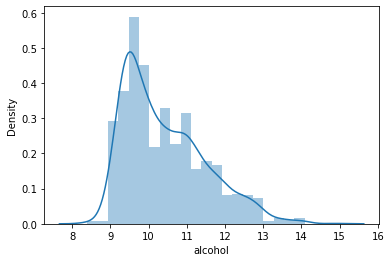

In [15]:
# Lets see how alcohol concentration is distributed with respect to the quality of the red wine.
sns.distplot(dfcla['alcohol'])

we can see that alcohol distribution is positively skewed with the quality of the red wine

In [16]:
from scipy.stats import skew
skew(dfcla['alcohol'])

0.8600235584837123

The output verifies that alcohol is positively skewed. That gives deeper insight into the alcohol column.

Alcohol Vs Quality:

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

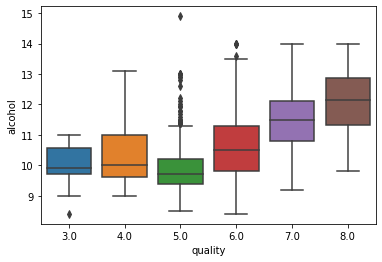

In [17]:
sns.boxplot(x='quality', y='alcohol', data = dfcla)

The higher the alcohol concentration is, the higher the quality of the wine.

Alcohol versus pH

In [18]:


#Aggreagate function
dfcla.groupby(['quality'])['pH'].mean()

quality
3.0    3.398000
4.0    3.381509
5.0    3.304949
6.0    3.318072
7.0    3.290754
8.0    3.267222
Name: pH, dtype: float64

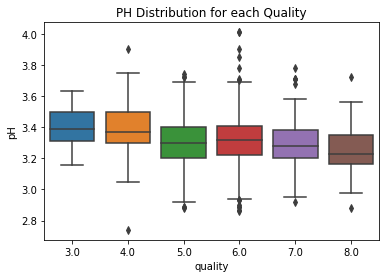

In [19]:
b = sns.boxplot(y='pH', x='quality', data=dfcla);
b.set_title("PH Distribution for each Quality");

For higher quality of red wine pH value lies between 3.0 to 3.6 range

###### Identifying and extracting the Dependent and Independent Variable

Dependant variable:- quality

Independant Variable:- fixed acidity volatile acidity citric acid residual sugar chlorides free sulfur dioxide total sulfur dioxide density pH sulphates alcohol

Now in the next step I'm extracting the "y" variable and "X" variable and dropping some columns

In [20]:
X = dfcla.drop(['quality'],axis=1)
y = dfcla['quality']

In [21]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.997,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.998,3.51,0.56,9.4


In [22]:
y.head()

0    5.0
1    5.0
2    5.0
3    6.0
4    5.0
Name: quality, dtype: float64

In [23]:
# correlation Matrix on X variables

In [24]:
X.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.665438,-0.682978,0.183006,-0.061669
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.020175,0.234937,-0.260987,-0.202288
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.363000,-0.541904,0.312770,0.109902
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355071,-0.085652,0.005527,0.042076
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.195543,-0.265026,0.371260,-0.221141
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.025318,0.070377,0.051658,-0.069408
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.061594,-0.066495,0.042947,-0.205653
density,0.665438,0.020175,0.363000,0.355071,0.195543,-0.025318,0.061594,1.000000,-0.342838,0.143370,-0.490861
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.342838,1.000000,-0.196648,0.205633
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.143370,-0.196648,1.000000,0.093595


<AxesSubplot:>

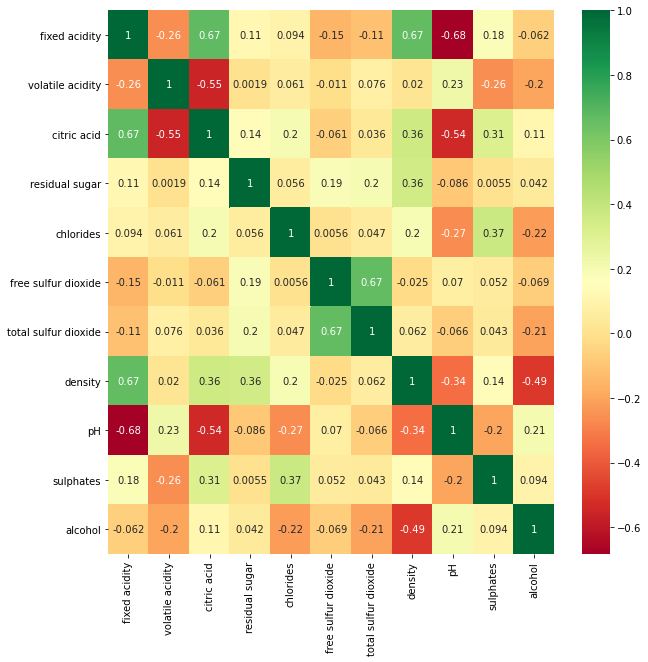

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(X.corr(),annot=True,cmap='RdYlGn')

##### Observation:-¶
Alcohol is positively correlated with the quality of the red wine.

Alcohol has a weak positive correlation with the pH value.

Alcohol is negatively correlated with fixed acidity, volatile acidity, chlorides, free sulfur dioxide ,total sulfur dioxide and density.

Citric acid and density have a strong positive correlation with fixed acidity

pH has a negative correlation with density, fixed acidity, citric acid, and sulfates.

#### Logistics Regression

In [26]:
#Shuffle the rows of the dataframe
shuf = dfcla.sample(frac = 1, random_state=0)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X))
y = pd.Series(y)

In [28]:
#Do k-fold cross validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_scaled,y,cv=4).mean()

0.5741353383458647

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,random_state=0,test_size=0.25)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
1109,1.425044,-0.323013,0.816598,-0.311323,1.775397,1.063900,0.593954,0.660428,-0.914312,0.601055,0.353895
1032,-0.126188,1.632254,-1.391472,1.107633,0.160114,-1.039977,-0.987312,1.189499,0.316751,-0.756246,-0.772511
1002,0.448342,-1.328579,0.303093,-0.346797,-0.520005,-0.274931,-0.591995,-0.926784,-0.331177,1.073160,1.198700
487,1.080326,0.654620,0.457144,-0.524166,-0.732542,-1.039977,-0.987312,0.660428,-0.914312,-1.405390,-0.397042
979,2.229387,-0.434742,1.124700,-0.807957,-0.264960,-1.231239,-1.230584,0.131358,-1.173483,-0.166115,-0.021574


In [30]:
#train the model on the training set
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [31]:
#Test accuracy
model.score(X_test,y_test)

0.63

In [32]:
#Let's look at some other scores as well
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        14
         5.0       0.69      0.76      0.72       169
         6.0       0.61      0.64      0.62       170
         7.0       0.43      0.38      0.40        40
         8.0       0.00      0.00      0.00         5

    accuracy                           0.63       400
   macro avg       0.29      0.30      0.29       400
weighted avg       0.59      0.63      0.61       400



In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_pred) # this accuracy for my data.

0.63

In [34]:
print(confusion_matrix(y_test,y_pred))

[[  0   0   2   0   0   0]
 [  0   0   9   4   1   0]
 [  0   0 129  40   0   0]
 [  0   0  45 108  17   0]
 [  0   0   3  22  15   0]
 [  0   0   0   3   2   0]]


From the above Logistics model model we can see that Accuracy score is 63 , In the next step we are going to do Grid search to see hyper tunned results for the model

In [39]:
# Grid search cross validation
grid_params = {
            'penalty' : ['l1', 'l2'],
            'C' : np.logspace(0.01,0.1,1),
              }
model = GridSearchCV(LogisticRegression(), grid_params,cv=4)
model.fit(X,y)
print (grid_params)

{'penalty': ['l1', 'l2'], 'C': array([1.02329299])}


In [40]:
print (model.best_score_)

0.5634915413533834


In [41]:
print (model.best_params_)

{'C': 1.023292992280754, 'penalty': 'l2'}


In [42]:
print (model.best_estimator_)

LogisticRegression(C=1.023292992280754)


In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [44]:
best_model=model.fit(X_train,y_train)

In [45]:
best_score= model.score(X_test,y_test)
print (best_score)

0.5975


In [46]:
cross_val_score(LogisticRegression(C = 1.023292992280754, penalty = 'l2'),X,y,cv=4).mean()

0.5634915413533834

In [47]:
y_pred = best_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00        16
         5.0       0.65      0.75      0.70       171
         6.0       0.55      0.63      0.59       167
         7.0       0.57      0.10      0.16        42
         8.0       0.00      0.00      0.00         3

    accuracy                           0.60       400
   macro avg       0.29      0.25      0.24       400
weighted avg       0.57      0.60      0.56       400



In [48]:
Log_Acc=accuracy_score(y_test,y_pred)
Log_Acc

0.5975

In [49]:
print(confusion_matrix(y_test,y_pred))

[[  0   0   1   0   0   0]
 [  0   0   9   7   0   0]
 [  0   0 129  42   0   0]
 [  0   0  58 106   3   0]
 [  0   0   3  35   4   0]
 [  0   0   0   3   0   0]]


From the above Logistics regression  model we can see that Accuracy score is 59.75 for my dataset

### K-Nearest Neighbor (KNN)

In [50]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
X_train= st_x.fit_transform(X_train)    
X_test= st_x.transform(X_test) 

In [51]:
 from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print ('train score',knn.score(X_train,y_train))
print ('test score',knn.score(X_test,y_test))

train score 0.7080900750625522
test score 0.5625


In [52]:
#see the cross_validated score for cv=4
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=4).mean()

0.4365194235588972

In [53]:
scores = []
for i in range(1,11,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=4).mean())

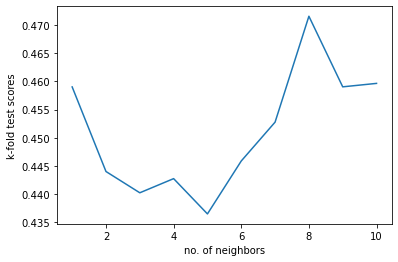

In [54]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()

From the above graph we can predict 8-NN is the best neighbors for the dataset. In the next step we are going to do Grid search to see hyper tunned results for the model 

In [55]:
grid_params = {
            'n_neighbors': [3,5,11],
            'weights':['uniform','distance'],
            'metric':['euclidean','manhattan']
        }
model = GridSearchCV(KNeighborsClassifier(), grid_params,cv=4)
model.fit(X,y)
print (grid_params)

{'n_neighbors': [3, 5, 11], 'weights': ['uniform', 'distance'], 'metric': ['euclidean', 'manhattan']}


In [56]:
print (model.best_score_)

0.48964912280701756


In [58]:
print (model.best_params_) # best params for my KNN model

{'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}


In [59]:
print (model.best_estimator_)

KNeighborsClassifier(metric='manhattan', n_neighbors=11, weights='distance')


In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [61]:
best_model=model.fit(X_train,y_train)
print (best_model)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 11],
                         'weights': ['uniform', 'distance']})


In [62]:
best_score= model.score(X_test,y_test)
print (best_score)

0.625


In [63]:
cross_val_score(KNeighborsClassifier(n_neighbors=11,weights='distance'),X,y,cv=4).mean()

0.4583959899749373

In [64]:
knn.fit(X_train, y_train)
pred_knn = knn.predict(X_test)
pred_knn
print(classification_report(y_test, pred_knn))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.50      0.06      0.11        16
         5.0       0.54      0.77      0.63       171
         6.0       0.54      0.43      0.48       167
         7.0       0.36      0.19      0.25        42
         8.0       0.00      0.00      0.00         3

    accuracy                           0.53       400
   macro avg       0.32      0.24      0.24       400
weighted avg       0.51      0.53      0.50       400



In [65]:
Knn_Acc=accuracy_score(y_test, pred_knn)
Knn_Acc

0.5275

In [66]:
print(confusion_matrix(y_test, pred_knn))

[[  0   0   0   1   0   0]
 [  0   1  10   4   1   0]
 [  1   1 131  33   5   0]
 [  0   0  88  71   8   0]
 [  0   0  14  20   8   0]
 [  0   0   1   2   0   0]]


From the above KNN  model we can see that Accuracy score is 52.75 for my dataset

### Randomn Forest

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
print ('train score',RFC.score(X_train,y_train))
print ('test score',RFC.score(X_test,y_test))

train score 1.0
test score 0.69


In [69]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=1),
                                  X,y,cv=4).mean())

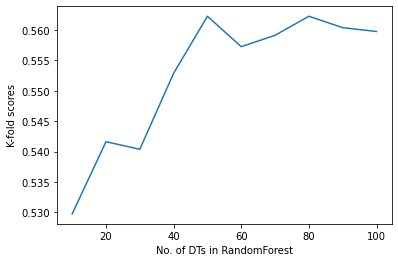

In [70]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

From the above graph we can predict  that 80 should the Decision trees in the Randomn forest model . In the next step we are going to do Grid search to see hyper tunned results for the model

In [84]:
params = {
            'n_estimators': [80,90,100,110,120,130],
            'max_depth': [13,14,15]
        }
modelr = GridSearchCV(RandomForestClassifier(), params,cv=4)
modelr.fit(X,y)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [80, 90, 100, 110, 120, 130]})

In [85]:
modelr.best_params_ # the best params for my RF model

{'max_depth': 14, 'n_estimators': 110}

In [86]:
modelr.best_estimator_

RandomForestClassifier(max_depth=14, n_estimators=110)

In [87]:
modelr.best_score_

0.569125939849624

In [88]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [89]:
best_model=modelr.fit(X_train,y_train)
print (best_model)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [13, 14, 15],
                         'n_estimators': [80, 90, 100, 110, 120, 130]})


In [90]:
best_score= modelr.score(X_test,y_test)
print (best_score)

0.69


In [94]:
cross_val_score(RandomForestClassifier(n_estimators=110,max_depth=14),X,y,cv=4).mean()

0.5678775062656641

In [95]:
RFC.fit(X_train, y_train)
pred_rfc = RFC.predict(X_test)
pred_rfc
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00        16
         5.0       0.73      0.84      0.78       171
         6.0       0.70      0.71      0.71       167
         7.0       0.58      0.45      0.51        42
         8.0       0.50      0.33      0.40         3

    accuracy                           0.71       400
   macro avg       0.42      0.39      0.40       400
weighted avg       0.67      0.71      0.69       400



In [96]:
Rf_Acc=accuracy_score(y_test, pred_rfc)
Rf_Acc

0.7075

In [97]:
print(confusion_matrix(y_test, pred_rfc))

[[  0   0   1   0   0   0]
 [  0   0  10   5   1   0]
 [  0   0 144  26   1   0]
 [  0   0  38 119  10   0]
 [  0   0   3  19  19   1]
 [  0   0   0   0   2   1]]


From the above Radomn Forest  model we can see that Accuracy score is 70.75 for my dataset

#### Adaboost

In [98]:
from sklearn.ensemble import AdaBoostClassifier
ABC = AdaBoostClassifier()
ABC.fit(X_train, y_train)
print ('train score',ABC.score(X_train,y_train))
print ('test score',ABC.score(X_test,y_test))

train score 0.5421184320266889
test score 0.565


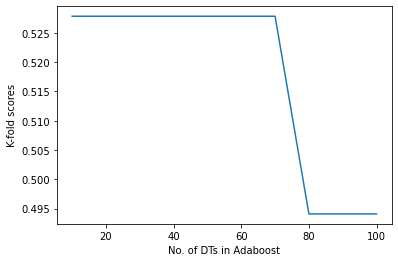

In [99]:


#Graph k-fold score vs no. of estimators in Adaboost which uses DT as base estimators
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(AdaBoostClassifier(n_estimators=i,random_state=1),
                                  X,y,cv=4).mean())
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in Adaboost')
plt.ylabel('K-fold scores')
plt.show()

From the above graph we can predict  that 70 should the Decision trees in the Randomn forest model . In the next step we are going to do Grid search to see hyper tunned results for the model

In [100]:
from sklearn.tree import DecisionTreeClassifier
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [60,70,80,90],
            'base_estimator': [DecisionTreeClassifier(max_depth=9,random_state=0),
                               DecisionTreeClassifier(max_depth=10,random_state=0),
                               DecisionTreeClassifier(max_depth=11,random_state=0)]
        }
modela = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=4)
modela.fit(X,y)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=9,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=11,
                                                                   random_state=0)],
                         'n_estimators': [60, 70, 80, 90]})

In [101]:
modela.best_params_ # best params for my Adaboost model

{'base_estimator': DecisionTreeClassifier(max_depth=11, random_state=0),
 'n_estimators': 70}

In [102]:
modela.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=11,
                                                         random_state=0),
                   n_estimators=70, random_state=0)

In [103]:
modela.best_score_

0.5628712406015038

In [104]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [105]:
best_model=modela.fit(X_train,y_train)
print (best_model)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=9,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=11,
                                                                   random_state=0)],
                         'n_estimators': [60, 70, 80, 90]})


In [106]:
best_score= modela.score(X_test,y_test)
print (best_score)

0.6775


In [107]:
cross_val_score(AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=10,random_state=0),n_estimators=90,random_state=0),X,y,cv=4).mean()

0.5391196741854636

In [108]:
ABC.fit(X_train, y_train)
pred_abc = ABC.predict(X_test)
pred_abc
print(classification_report(y_test, pred_abc))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00        16
         5.0       0.59      0.88      0.70       171
         6.0       0.56      0.45      0.50       167
         7.0       0.00      0.00      0.00        42
         8.0       0.14      0.33      0.20         3

    accuracy                           0.56       400
   macro avg       0.21      0.28      0.23       400
weighted avg       0.48      0.56      0.51       400



In [109]:
AdB_Acc=accuracy_score(y_test, pred_abc)
AdB_Acc

0.565

In [110]:
print(confusion_matrix(y_test, pred_abc))

[[  0   0   1   0   0   0]
 [  1   0  11   4   0   0]
 [  1   0 150  20   0   0]
 [  0   0  88  75   0   4]
 [  0   0   6  34   0   2]
 [  0   0   0   2   0   1]]


From the above Adaboost model we can see that Accuracy score is 56.5 for my dataset

#### SVR

In [111]:
from sklearn.svm import SVC

In [112]:
classifer= SVC(kernel='rbf')

In [113]:
classifer.fit(X_train,y_train)

SVC()

In [114]:
params_dictionary = {
                        'C' : [0.1, 1, 10],
                        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                        'degree': [2,3],
                        
                    }

models = GridSearchCV(SVC(random_state=0),param_grid=params_dictionary,cv=4)

In [115]:
models.fit(X,y)

GridSearchCV(cv=4, estimator=SVC(random_state=0),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [116]:
models.best_params_

{'C': 10, 'degree': 2, 'kernel': 'linear'}

In [117]:
models.best_score_

0.579124373433584

In [118]:
svc =models.best_estimator_

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [120]:
svc.fit(X_train,y_train)

SVC(C=10, degree=2, kernel='linear', random_state=0)

In [121]:
svc.score(X_test,y_test)

0.6175

In [122]:
y_pred = svc.predict(X_test)


In [123]:
cross_val_score(SVC(C = 10, degree = 2, kernel = 'linear'),X,y,cv=4).mean()

0.579124373433584

In [124]:
classifer.fit(X_train, y_train)
pred_regs = svc.predict(X_test)
pred_regs
print(classification_report(y_test, pred_regs))

              precision    recall  f1-score   support

         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00        14
         5.0       0.66      0.78      0.71       169
         6.0       0.58      0.68      0.63       170
         7.0       0.00      0.00      0.00        40
         8.0       0.00      0.00      0.00         5

    accuracy                           0.62       400
   macro avg       0.21      0.24      0.22       400
weighted avg       0.53      0.62      0.57       400



In [125]:
Svc_Acc=accuracy_score(y_test, pred_regs)
Svc_Acc

0.6175

In [126]:
print(confusion_matrix(y_test, pred_regs))

[[  0   0   2   0   0   0]
 [  0   0  10   4   0   0]
 [  0   0 131  38   0   0]
 [  0   0  53 116   1   0]
 [  0   0   2  38   0   0]
 [  0   0   0   4   1   0]]


From the above SVC model we can see that Accuracy score is 61.75  for my dataset

Conclusion :

Logistics regression 

cross value score = 56.34
accuracy = 59.75



Knn 
cross value score = 45.83
accuracy = 52.75




Randonm Forest 
cross value score = 56.78
accuracy = 70.75   



Adaboost

cross value score = 53.91
accuracy = 56.5%



SVC
cross value score = 57.91%
accuracy = 61.75


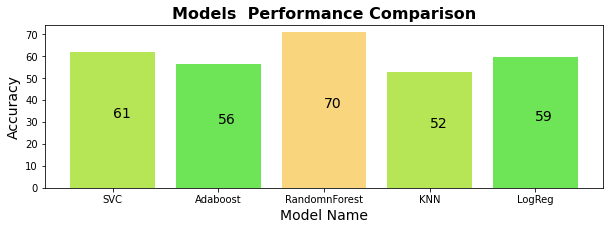

In [127]:
import numpy as np
import matplotlib.pyplot as plt


Accuracy_scores = [Svc_Acc*100, AdB_Acc*100, Rf_Acc*100,Knn_Acc*100,Log_Acc*100]
model_names = ['SVC', 'Adaboost', 'RandomnForest','KNN','LogReg']

total_bar = np.arange(len(model_names))
color = ['#9edd1d', '#3edd1d', '#f7c851']

fig, ax = plt.subplots(figsize=(10, 3))
bar = plt.bar(model_names, Accuracy_scores, align='center', alpha=.75, color=color)
plt.xticks(total_bar, model_names)
plt.ylabel('Accuracy',fontsize=14, color='black')
plt.xlabel('Model Name',fontsize=14, color='black')
plt.title('Models  Performance Comparison', fontsize=16, color='black', fontweight='bold')

# # this functions will set data lebel 
def autolabel(bar):
    for bar in bar:
        height = int(bar.get_height())
        ax.text(bar.get_x() + .4, .5*height,
                height, va='bottom',
                fontsize=14, color='black')
        
autolabel(bar)

plt.show()


From the above scores and graph we can see that Randomn Forest is a better model and gives a better score for the dataset